In [1]:
import pandas as pd
import numpy as np 
from sklearn import tree

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [4]:
X = pd.get_dummies(X, dtype=int)
X.head()
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [5]:
X = X.fillna({'Age' : int(X.Age.median())})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [6]:
y = df.Survived
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [7]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [8]:
clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

[Text(0.6205491984200744, 0.975, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.39792925185873607, 0.925, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.5092392251394052, 0.95, 'True  '),
 Text(0.20152764869888476, 0.875, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.08364312267657993, 0.825, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.0762081784386617, 0.775, 'Parch <= 0.5\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(0.0687732342007435, 0.725, 'SibSp <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06133828996282528, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0762081784386617, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08364312267657993, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.09107806691449814, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3194121747211896, 0.

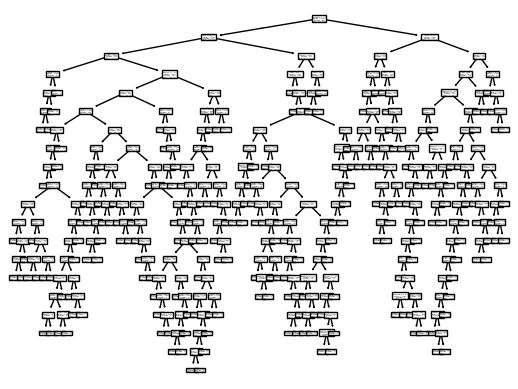

In [9]:
tree.plot_tree(clf, feature_names=X.columns)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =42)

In [11]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9798657718120806

In [12]:
clf.score(X_test, y_test)

0.7627118644067796

In [13]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
clf.score(X_test, y_test)

0.823728813559322

In [15]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame({'max_depth' : [], 'train_score' : [], 'test_score' : []})


In [16]:

for depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(X_train, y_train)
    temp_scores_data = pd.DataFrame({'max_depth' : [depth], 'train_score' : [clf.score(X_train, y_train)], 'test_score' : [clf.score(X_test, y_test)]})
    scores_data = pd.concat([scores_data, temp_scores_data])


In [17]:

scores_data

,max_depth,train_score,test_score
0,1.0,0.781879,0.796610
0,2.0,0.805369,0.776271
0,3.0,0.823826,0.820339
0,4.0,0.833893,0.823729
0,5.0,0.840604,0.810169
...,...,...,...
0,95.0,0.979866,0.766102
0,96.0,0.979866,0.755932
0,97.0,0.979866,0.772881
0,98.0,0.979866,0.772881


<Axes: xlabel='max_depth'>

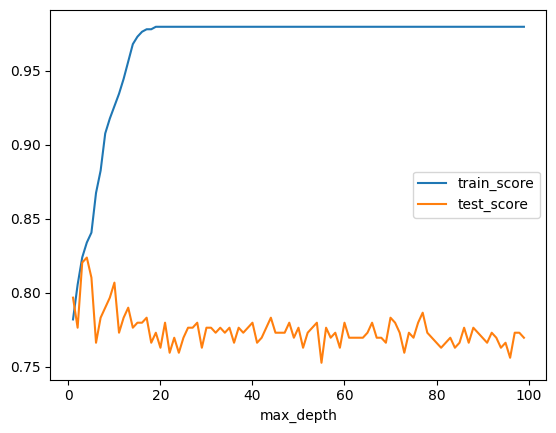

In [18]:
import seaborn as sns

scores_data.plot(x='max_depth', y=['train_score', 'test_score'], legend = True)

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4)

cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [21]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame({'max_depth' : [], 'train_score' : [], 'test_score' : [], 'cross_val_score' : []})


for depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(X_train, y_train)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_scores_data = pd.DataFrame({'max_depth' : [depth], 'train_score' : [clf.score(X_train, y_train)], 'test_score' : [clf.score(X_test, y_test)], 'cross_val_score' : mean_cross_val_score})
    scores_data = pd.concat([scores_data, temp_scores_data])


In [22]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1.0,0.781879,0.796610,0.781961
0,2.0,0.805369,0.776271,0.770196
0,3.0,0.823826,0.820339,0.790322
0,4.0,0.833893,0.823729,0.788627
0,5.0,0.840604,0.806780,0.797031


<Axes: xlabel='max_depth'>

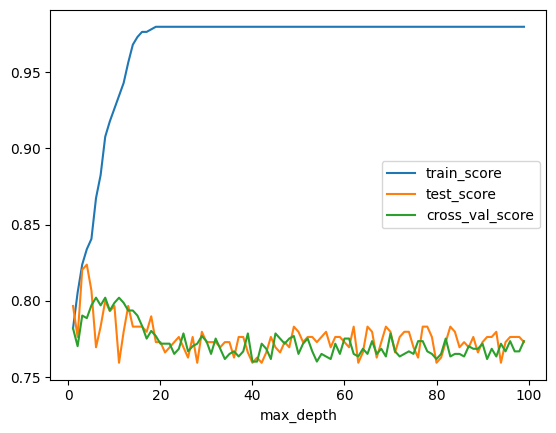

In [23]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score', 'cross_val_score'], legend = True)

In [24]:
max_score = scores_data["cross_val_score"].max()
scores_data[scores_data['cross_val_score'] == max_score]

,max_depth,train_score,test_score,cross_val_score
0,6.0,0.86745,0.769492,0.802073


In [25]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7864406779661017

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
clf = tree.DecisionTreeClassifier()

In [28]:
params = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1, 100)}
grid_research_cv = GridSearchCV(clf, params, cv=5)

In [29]:
grid_research_cv.fit(X_train, y_train)
grid_research_cv.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [30]:
best_clf = grid_research_cv.best_estimator_

best_clf.score(X_test, y_test)

0.8

In [31]:
from sklearn.metrics import precision_score, recall_score

y_pred = best_clf.predict(X_test)
precision_score(y_test, y_pred)

0.8210526315789474

In [32]:
recall_score(y_test, y_pred)

0.65

numpy.ndarray

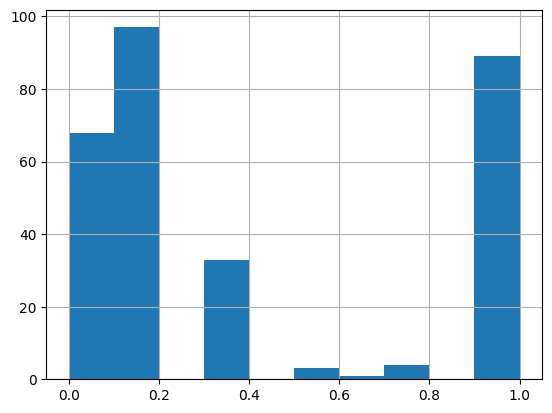

In [33]:
y_predicted_prob = best_clf.predict_proba(X_test)
pd.Series(y_predicted_prob[:, 1]).hist()
type(y_predicted_prob)

In [35]:

y_predicted_prob = np.where(y_predicted_prob[1] > 0.8, 1, 0)
y_predicted_prob
# pd.Series(y_predicted_prob[:, 1]).hist()

array([0, 0])